Notebook 6

# Clasification Models

In [1]:
# Importar las bibliotecas necesarias:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
%load_ext kedro.ipython

[10/23/23 21:02:06] INFO     Resolved project path as: c:\Users\Pablo                               __init__.py:139
                             Villar\Desktop\CURSOS\KSchool\Máster en Data                                          
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\hado.                                  
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/23/23 21:02:06] WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \kedro\framework\session\session.py:266: FutureWarning: ConfigLoader                  
                             will be deprecated in Kedro 0.19. Please use the OmegaConfigLoader                    
                             instead. To consult the documentation for OmegaConfigLoader, see here:                
                             https://docs.kedro.org/en/stable/configuration/advanced_configuration.                
                             html#omegaconfigloader                                                                
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \kedro\io\data_catalog.py:300: FutureWarning: Defining the 'layer'                    
                             attribute at the top level is deprecated and will be removed in Kedro                 
                             0.19.0. Please move 'layer' inside the 'metadata' -> 'kedro-viz'                      
                             attributes. See                                                                       
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

[10/23/23 21:02:07] INFO     Kedro project hado                                                     __init__.py:108

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:109
                             'pipelines'                                                                           

[10/23/23 21:02:08] INFO     Registered line magic 'run_viz'                                        __init__.py:115

In [3]:
catalog.layers


defaultdict(<class 'set'>, {
    'raw': {'hado_21', 'hado_22', 'hado_17', 'hado_20', 'hado_18', 'hado_19'},
    'raw_preprocessing': {'hado_concat'},
    'raw_processing': {'hado_clean'},
    'intermediate_processing': {
        'hado_barthel_cleaned',
        'hado_gds_fast_cleaned',
        'hado_ps_ecog_cleaned',
        'hado_cleaned',
        'hado_replaced_words',
        'hado_clean_na',
        'hado_lat_lon'
    },
    'final_processing': {'hado_cleaned_sedation', 'hado_cleaned_medication', 'hado_categorized'},
    'feature': {'hado_final'},
    'model': {'hado_encoded'},
    'model_alta': {
        'y_alta_train',
        'y_alta_test',
        'best_model_alta',
        'random_forest_model_alta',
        'X_alta_train_preprocessed',
        'lightgbm_model_alta',
        'xgboost_model_alta',
        'preprocessor_alta',
        'X_alta_test_preprocessed'
    },
    'model_diagnostic': {
        'X_diag_test_preprocessed',
        'y_diag_train',
        'xgboost_model_dia

In [10]:
df = catalog.load('hado_encoded')

[10/23/23 21:03:07] INFO     Loading data from 'hado_encoded' (CSVDataSet)...                   data_catalog.py:492

In [11]:
df.describe(include='object').T

,count,unique,top,freq
h_procedencia,4013,17,clinico,2240
s_procedencia,4013,100,no,1225
diagnostico,4013,1513,ITU,173
motivo_ing,4013,560,control sintomas,1229
motivo_alta,4013,90,fin cuidados,2380
fecha_alta,4013,213,unknown,3253
sedacion,4013,26,no,3320
ps_ecog_classification,4013,5,Encamado el 100%,2220
barthel_classification,4013,5,Dependencia total,1855
gds_fast_classification,4013,8,No realizado o desconocido,3171


In [12]:
columns = ['diagnosis_category', 'ingreso_category', 'alta_category', 'procedencia_category', 'otros_category', 'categorized_combined_otros']
for col in columns:
    print(set(df[col]))
# diagnosis_category {'Canceres':0, 'Enfermedades Cardiacas':1, 'Infecciones':2, 'Otros':3}
# ingreso_category {'Tratamientos': 0, 'Evaluaciones': 1, 'Sintomas': 2, 'Otros': 3}
# alta_category {'Exitus': 0, 'Recuperación': 1, 'Complicaciones': 2, 'Otros': 3}
# procedencia_category {'Urgencias': 0, 'Oncología': 1, 'MIR': 2, 'Otros': 3}
# otros_category {'Especialidades Médicas':0, 'No especificado':1, 'Otros': 2}
# categorized_combined_otros {'Condiciones relacionadas con la familia o el entorno': 0,  'Sintomas generales': 1, 'Desconocido/No especificado': 2, 'Complicaciones': 3, 'Otros': 4}


{1, 3, 4, 5, 6, 7, 8, 9, 10, 11}
{0, 1, 2, 3}
{0, 1, 2, 3}
{0, 1, 2, 3, 4, 5, 6, 7, 8}
{0, 1, 2}
{0, 1, 2, 3, 4}


# RandomForestClassifier

In [18]:
df = df.select_dtypes(exclude='object')
df.shape

(4013, 37)

In [19]:
df.columns


Index(['hospital_category', 'procedencia_category', 'diagnosis_category',
       'ingreso_category', 'alta_category', 'ap', 'n_estancias', 'n_visitas',
       'paliativo_onc_noc', 'paliativo_no_onc_noc', 'fiebre', 'disnea',
       'dolor', 'delirium', 'p_terminal', 'agonia', 'ast_anorx',
       'cronico_reag', 'trato_antibiotico', 'transfusion', 'paracentesis',
       'agudo_estable', 'toracocentesis', 'fe_iv', 'ps_ecog', 'barthel',
       'gds_fast', 'eva_ing', 'otros_category', 'categorized_combined_otros',
       'tiene_sedacion', 'morfina', 'midazolam', 'buscapina', 'haloperidol',
       'levomepromazina', 'year'],
      dtype='object')

In [20]:
target = 'diagnosis_category'
y = df[target]
X = df.drop(columns=target)
                     
# Splitting our data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [21]:
# Entrenar el RandomForestClassifier:

# Crear el clasificador
clf = RandomForestClassifier(random_state=42)

# Entrenar el clasificador
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
# Evaluar el modelo:

# Predicciones
y_pred = clf.predict(X_test)

# Medir la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 47.32%
              precision    recall  f1-score   support

           1       0.50      0.49      0.49        45
           3       0.44      0.30      0.35        88
           4       0.46      0.20      0.28        56
           5       0.42      0.17      0.25        46
           6       0.29      0.10      0.15        49
           7       0.57      0.79      0.66       169
           8       0.60      0.41      0.49        22
           9       0.31      0.24      0.27        62
          10       0.56      0.35      0.43        40
          11       0.43      0.61      0.50       226

    accuracy                           0.47       803
   macro avg       0.46      0.37      0.39       803
weighted avg       0.46      0.47      0.45       803



El rendimiento del modelo RandomForest puede mejorarse ajustando sus parámetros, como **n_estimators**, **max_depth**, **min_samples_split**, entre otros. Pueden usarse técnicas como búsqueda en cuadrícula (**GridSearchCV**) para encontrar la combinación óptima de parámetros.

In [23]:
# Preparar los datos:

target = 'procedencia_category'
y = df[target]
X = df.drop(columns=target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Configurar el GridSearchCV:

# Definir la cuadrícula de parámetros
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el clasificador
clf = RandomForestClassifier(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)
# n_jobs=-1 permite que se utilicen todos los núcleos de la CPU para acelerar el proceso.

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=2)

In [25]:
# Evaluar el modelo con los mejores parámetros:

# Usar el mejor modelo encontrado por GridSearchCV
best_clf = grid_search.best_estimator_

# Predicciones
y_pred = best_clf.predict(X_test)

# Medir la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print(report)

# Ver los mejores parámetros
print("Best Parameters:", grid_search.best_params_)

Accuracy: 64.76%


[10/23/23 21:04:22] WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:                     
                             Precision and F-score are ill-defined and being set to 0.0 in labels                  
                             with no predicted samples. Use `zero_division` parameter to control                   
                             this behavior.                                                                        
                               _warn_prf(average, modifier, msg_start, len(result))                                
                                                                                                                   

                    WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:                     
                             Precision and F-score are ill-defined and being set to 0.0 in labels                  
                             with no predicted samples. Use `zero_division` parameter to control                   
                             this behavior.                                                                        
                               _warn_prf(average, modifier, msg_start, len(result))                                
                                                                                                                   

                    WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:                     
                             Precision and F-score are ill-defined and being set to 0.0 in labels                  
                             with no predicted samples. Use `zero_division` parameter to control                   
                             this behavior.                                                                        
                               _warn_prf(average, modifier, msg_start, len(result))                                
                                                                                                                   

              precision    recall  f1-score   support

           0       0.57      0.18      0.28        88
           1       0.55      0.89      0.68       123
           2       0.40      0.60      0.48       107
           3       0.79      0.80      0.80       386
           4       0.76      0.48      0.59        33
           5       1.00      0.09      0.16        35
           6       1.00      0.17      0.29        18
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        10

    accuracy                           0.65       803
   macro avg       0.56      0.36      0.36       803
weighted avg       0.68      0.65      0.62       803

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [26]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": best_clf.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

,feature,importance
0,hospital_category,0.232173
4,ap,0.163487
1,diagnosis_category,0.072014
7,paliativo_onc_noc,0.066321
5,n_estancias,0.056774
2,ingreso_category,0.044602
6,n_visitas,0.041409
24,barthel,0.040935
35,year,0.029318
25,gds_fast,0.029111


# Estandarización del conjunto de datos

In [27]:
# estandarizar el conjunto de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Dividiendo el conjunto de datos en datos de entrenamiento y prueba

# dividir en conjunto de entrenamiento (train) y 
#conjunto de prueba (test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=42
    )

In [29]:
# Construyendo el Clasificador de bosque aleatorio
from sklearn.ensemble import RandomForestRegressor

# crear el clasificador
regressor = RandomForestRegressor(n_estimators=100)

# Entrenar el modelo usando el conjunto de entranamiento
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
# Después del entrenamiento, podemos realizar predicciones sobre los datos de la prueba.
# predicción en el conjunto de prueba
y_pred = regressor.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Es equivalente a sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

MSE: 1.8975
RMSE: 1.3775
MAE: 0.8620
R^2: 0.1943


In [32]:
# Identificar características importantes
# verificar características importantes

feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": regressor.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df


,feature,importance
5,n_estancias,0.157308
6,n_visitas,0.102463
1,diagnosis_category,0.101514
24,barthel,0.086836
35,year,0.071566
2,ingreso_category,0.050588
23,ps_ecog,0.047171
0,hospital_category,0.033248
25,gds_fast,0.028865
3,alta_category,0.028592


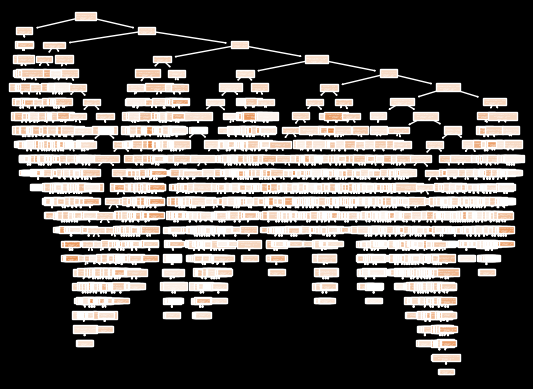

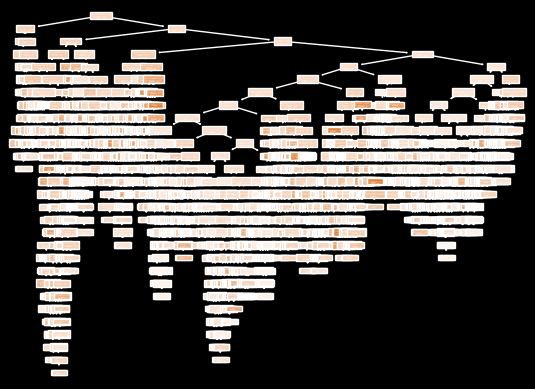

In [33]:
from sklearn import tree

num_trees_to_visualize = 2

for i in range(num_trees_to_visualize):
    tree.plot_tree(regressor.estimators_[i], feature_names=df.columns, filled=True)
    plt.show()

In [37]:
bosque = RandomForestClassifier(n_estimators=20,
                                criterion='gini',
                                max_features="sqrt",
                                bootstrap=True,
                                max_samples=2/3,
                                oob_score=True)
bosque.fit(X_train, y_train)

print(bosque.predict(X))
print(bosque.score(X, y))
print(bosque.oob_score_)

[10/23/23 21:09:05] WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \sklearn\base.py:432: UserWarning: X has feature names, but                           
                             RandomForestClassifier was fitted without feature names                               
                               warnings.warn(                                                                      
                                                                                                                   

[1 1 4 ... 2 2 1]


                    WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \sklearn\base.py:432: UserWarning: X has feature names, but                           
                             RandomForestClassifier was fitted without feature names                               
                               warnings.warn(                                                                      
                                                                                                                   

0.5220533266882631
0.5992799778454722


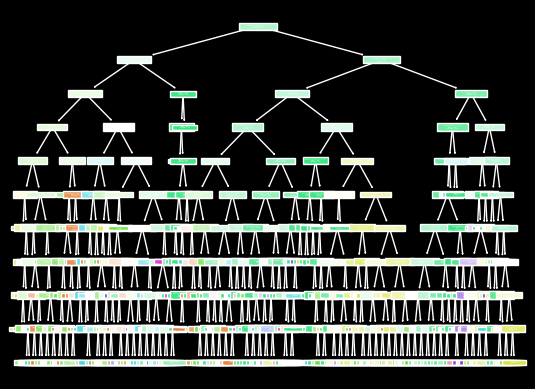

In [38]:
num_trees_to_visualize = 1

for arbol in range(num_trees_to_visualize):
    tree.plot_tree(best_clf.estimators_[i], feature_names=df.columns, filled=True)
    plt.show()

# XGBoost

In [39]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [43]:
# Preparación de datos:

target = 'diagnosis_category'
y = df[target]
X = df.drop(columns=target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Creación y entrenamiento del modelo:
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')
xgb_model.fit(X_train, y_train)
# Para un problema de regresión xgb.XGBRegressor()

# Si trabajamos con un problema de clasificación, utilizar xgb.XGBClassifier() en su lugar.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [45]:
# Predicción

y_pred = xgb_model.predict(X_test)

In [46]:
# Evaluación del modelo:

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Es equivalente a sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

MSE: 9.5001
RMSE: 3.0822
MAE: 2.4487
R^2: 0.0392


# Ajuste de hiperparámetros (opcional): 

* Algunos de los hiperparámetros más comunes incluyen: `learning_rate`, `max_depth`, `subsample`, `colsample_bytree`, y `n_estimators`.
  
Para encontrar la mejor combinación de hiperparámetros, a menudo se utiliza:
* **Validación cruzada**
* **GridSearchCV** 
* **RandomizedSearchCV**


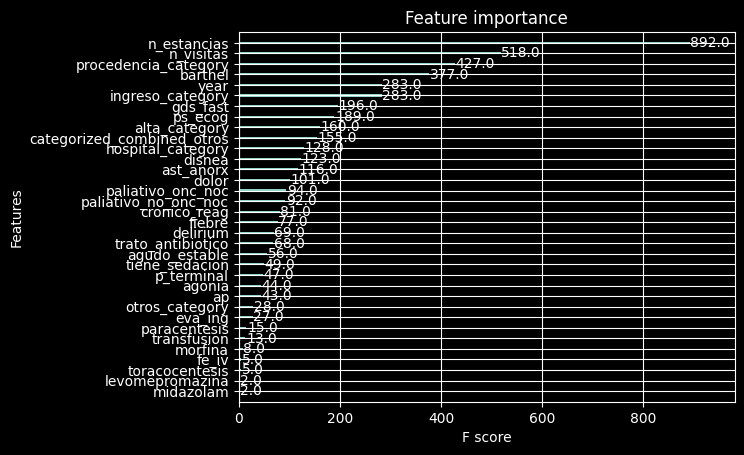

In [47]:
# Importancia de las características (opcional):

xgb.plot_importance(xgb_model)
plt.show()

In [51]:
# Preparación de datos:

target = 'alta_category'
y = df[target]
X = df.drop(columns=target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(objective ='reg:squarederror')
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Evaluación del modelo:

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Es equivalente a sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

MSE: 0.9004
RMSE: 0.9489
MAE: 0.3524
R^2: 0.5332


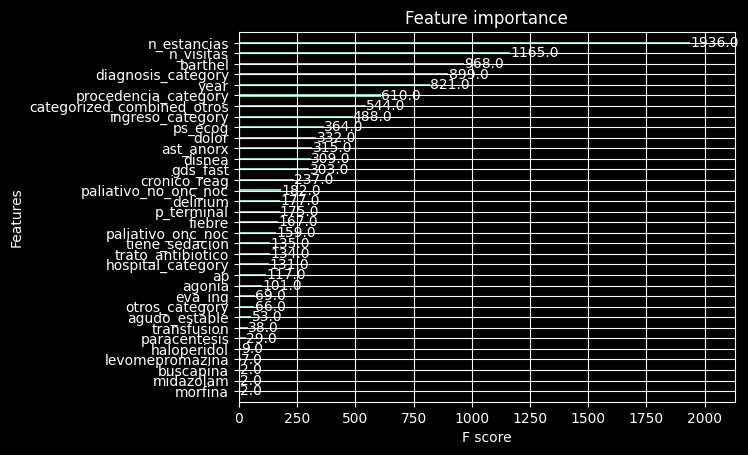

In [52]:
# Importancia de las características (opcional):

xgb.plot_importance(xgb_model)
plt.show()

# Modelos de clasificación

## Pronóstico de Alta

* Etiquetas (Variable Dependiente):

Motivo de Alta (alta_category): Esta será nuestra variable objetivo. Estamos tratando de predecir esta columna en función de otras características.

* Características (Variables Independientes):
Estas son las variables que usaríamos para predecir el motivo de alta. Pueden incluir, pero no se limitan a:

  * Diagnóstico (por ejemplo, diagnosis_category)
  * Motivo de ingreso (ingreso_category)
  * Procedencia (procedencia_category)
  * Características combinadas de "otros" (categorized_combined_otros)
  * Año (year)
  * Cualquier otra característica que pueda ser relevante para el motivo de alta.

* Preparación de Datos:

  * Datos Faltantes: Es esencial manejar cualquier dato faltante en las características y las etiquetas.
  * Codificación: Las variables categóricas necesitarán ser codificadas en un formato numérico para ser utilizadas en la mayoría de los modelos de clasificación. Esto se puede lograr a través de técnicas como la codificación one-hot o la codificación ordinal.
  * División del Conjunto de Datos: Dividiremos los datos en conjuntos de entrenamiento y prueba para entrenar y validar el rendimiento del modelo, respectivamente.
  * Estandarización: Es posible que necesitemos estandarizar o normalizar las características numéricas para que tengan la misma escala.

Una vez que hayamos preparado los datos, podemos proceder a entrenar varios modelos de clasificación (por ejemplo, regresión logística, árboles de decisión, bosques aleatorios, máquinas de vectores de soporte, etc.) y seleccionar el que ofrezca el mejor rendimiento.

In [53]:
%reload_ext kedro.ipython

[10/23/23 21:11:03] INFO     Resolved project path as: c:\Users\Pablo                               __init__.py:139
                             Villar\Desktop\CURSOS\KSchool\Máster en Data                                          
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\hado.                                  
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/23/23 21:11:03] WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \kedro\framework\session\session.py:266: FutureWarning: ConfigLoader                  
                             will be deprecated in Kedro 0.19. Please use the OmegaConfigLoader                    
                             instead. To consult the documentation for OmegaConfigLoader, see here:                
                             https://docs.kedro.org/en/stable/configuration/advanced_configuration.                
                             html#omegaconfigloader                                                                
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \kedro\io\data_catalog.py:300: FutureWarning: Defining the 'layer'                    
                             attribute at the top level is deprecated and will be removed in Kedro                 
                             0.19.0. Please move 'layer' inside the 'metadata' -> 'kedro-viz'                      
                             attributes. See                                                                       
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project hado                                                     __init__.py:108

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:109
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        __init__.py:115

In [54]:
df_final = catalog.load("hado_final")

[10/23/23 21:11:10] INFO     Loading data from 'hado_final' (CSVDataSet)...                     data_catalog.py:492

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Definir características y etiquetas
X = df_final.drop('alta_category', axis=1)
y = df_final['alta_category']

# Identificar columnas numéricas y categóricas
numeric_features = df_final.select_dtypes(exclude=['object']).columns.to_list()
numeric_features.remove('year')
numeric_features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = df_final.select_dtypes(include=['object']).columns.tolist()
valid_columns_2_6 = df_final[categorical_features].nunique().between(2, 6)
selected_categorical_features_2_6 = valid_columns_2_6[valid_columns_2_6].index.tolist()
selected_categorical_features_2_6.remove('alta_category')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, selected_categorical_features_2_6)])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar el preprocesador a los datos
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_preprocessed.shape, X_test_preprocessed.shape


((3210, 85), (803, 85))

In [56]:
df_final.columns


Index(['h_procedencia', 'hospital_category', 's_procedencia',
       'procedencia_category', 'diagnostico', 'diagnosis_category',
       'motivo_ing', 'ingreso_category', 'motivo_alta', 'alta_category',
       'fecha_alta', 'ap', 'n_estancias', 'n_visitas', 'paliativo_onc_noc',
       'paliativo_no_onc_noc', 'fiebre', 'disnea', 'dolor', 'delirium',
       'sedacion', 'p_terminal', 'agonia', 'ast_anorx', 'cronico_reag',
       'trato_antibiotico', 'transfusion', 'paracentesis', 'agudo_estable',
       'toracocentesis', 'fe_iv', 'ps_ecog', 'ps_ecog_classification',
       'barthel', 'barthel_classification', 'gds_fast',
       'gds_fast_classification', 'eva_ing', 'otros_complicaciones', 'otros',
       'otros_1', 'otros_2', 'otros_category', 'categorized_combined_otros',
       'tiene_sedacion', 'morfina', 'midazolam', 'buscapina', 'haloperidol',
       'levomepromazina', 'medico', 'ayuntamiento', 'year', 'latitude',
       'longitude'],
      dtype='object')

Paso 1: Selección del Modelo

Para el pronóstico de la categoría de alta, comenzaremos con un modelo de clasificación básico: la Regresión Logística. Este es un buen punto de partida porque es relativamente simple, interpretable y sirve como una línea base para comparar con modelos más complejos.

Paso 2: Entrenamiento del Modelo

Una vez seleccionado el modelo, lo entrenaremos usando el conjunto de entrenamiento. Esto implica alimentar al modelo con nuestras características y etiquetas de entrenamiento, permitiendo que "aprenda" las relaciones entre ellos.

Paso 3: Evaluación del Modelo

Después de entrenar el modelo, evaluaremos su rendimiento utilizando el conjunto de prueba. Observaremos métricas de clasificación comunes como la precisión, la exhaustividad (recall), el valor F1 y la matriz de confusión.

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Paso 1: Selección del Modelo
# Elegimos el modelo de Regresión Logística
logreg = LogisticRegression(max_iter=5000, random_state=42)

# Paso 2: Entrenamiento del Modelo
# Entrenamos el modelo utilizando el conjunto de entrenamiento
logreg.fit(X_train_preprocessed, y_train)

# Paso 3: Predicción y Evaluación
# Usamos el modelo entrenado para predecir las etiquetas del conjunto de prueba
y_pred = logreg.predict(X_test_preprocessed)

# Evaluamos el rendimiento del modelo utilizando varias métricas
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, classification_rep, conf_matrix



(
    0.8418430884184309,
    '                precision    recall  f1-score   support\n\nComplicaciones       0.60      0.12      0.20        25\n        Exitus       0.83      0.84      0.84       243\n         Otros       0.86      0.94      0.90       495\n  Recuperacion       0.25      0.07      0.12        40\n\n      accuracy                           0.84       803\n     macro avg       0.64      0.49      0.51       803\n  weighted avg       0.81      0.84      0.82       803\n',
    array([[  3,   7,  12,   3],
       [  1, 204,  37,   1],
       [  1,  23, 466,   5],
       [  0,  11,  26,   3]], dtype=int64)
)

* Paso 1: **Selección del Modelo**

Elegimos el modelo de Regresión Logística.
Para esto, vamos a usar la librería `sklearn`. En este caso, se va a utilizar un algoritmo llamado `LogisticRegression`

* Paso 2: **Entrenamiento del Modelo**

Entrenamos el modelo utilizando el conjunto de entrenamiento.

* Paso 3: **Evaluación del Modelo**

La exactitud (`accuracy`) del modelo en el conjunto de prueba es del 75.22%. Esto significa que el modelo hizo predicciones correctas para el 75.22% de los registros en el conjunto de prueba.

La matriz de confusión nos proporciona un desglose de las predicciones verdaderas positivas, falsas positivas, verdaderas negativas y falsas negativas para cada clase en la variable objetivo. Las filas representan las clases reales y las columnas representan las clases predichas.

El informe de clasificación proporciona métricas detalladas para cada clase, incluyendo:

* **Precision**: La proporción de predicciones positivas que fueron correctas.
* **Recall**: La proporción de casos positivos reales que fueron detectados.
* **F1-score**: Una métrica que combina precision y recall en un único valor.

El modelo parece tener un rendimiento decente para la clase "Otros" y "Exitus", pero lucha con "Complicaciones" y "Recuperación". Estas clases tienen menos registros, lo que podría explicar el rendimiento más bajo.

Si desea un rendimiento más alto o una mejor capacidad para manejar clases desequilibradas, podríamos considerar otros modelos o técnicas, como la sobremuestreo o submuestreo, o la utilización de algoritmos de ensamblaje.

In [58]:
# numeric_features = df_final.select_dtypes(exclude=['object']).columns.to_list()
# numeric_features.remove('year')
numeric_features


[
    'n_estancias',
    'n_visitas',
    'ps_ecog',
    'barthel',
    'gds_fast',
    'eva_ing',
    'tiene_sedacion',
    'morfina',
    'midazolam',
    'buscapina',
    'haloperidol',
    'levomepromazina'
]

In [59]:
from scipy.stats import pointbiserialr

# Crear una lista vacía para almacenar los resultados de correlación
correlation_results = []

# Recorrer cada característica numérica y calcular la correlación de punto biserial con 'alta_category'
for feature in numeric_features:
    # Convertir la variable objetivo a formato binario para la correlación de punto biserial
    # Aquí consideraremos 'Exitus' como 1 y todas las demás categorías como 0
    binary_y = (df_final['alta_category'] == 'Exitus').astype(int)
    
    correlation, p_value = pointbiserialr(df_final[feature], binary_y)
    correlation_results.append((feature, correlation, p_value))

# Convertir los resultados en un DataFrame para una mejor visualización
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Correlation', 'P-value'])
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

correlation_df


,Feature,Correlation,P-value
6,tiene_sedacion,0.655378,0.000000e+00
2,ps_ecog,0.445555,5.116096e-195
7,morfina,0.198685,5.248290e-37
8,midazolam,0.194145,2.216387e-35
9,buscapina,0.192609,7.697696e-35
1,n_visitas,0.077412,9.117894e-07
10,haloperidol,0.069276,1.121100e-05
5,eva_ing,0.053874,6.396715e-04
11,levomepromazina,0.050507,1.371637e-03
0,n_estancias,0.013946,3.771241e-01


**Las características tiene_sedacion, ps_ecog, morfina, midazolam, buscapina, n_visitas, haloperidol, eva_ing, y levomepromazina tienen correlaciones positivas con la variable objetivo. Esto significa que a medida que estas características aumentan, es más probable que la categoría de alta sea 'Exitus'.**

**Por otro lado, las características gds_fast, n_estancias, year, y barthel tienen correlaciones negativas, aunque algunas de ellas (como n_estancias y year) tienen correlaciones muy bajas y no son estadísticamente significativas.**

> la correlación no implica causalidad, y es posible que algunas de estas características estén correlacionadas entre sí.

* Identificaré las características numéricas con correlaciones significativas (basándome en un valor p).

* Seleccionaré las características categóricas que tienen entre 2 y 6 valores únicos.

* Combinaré ambas listas para obtener el conjunto final de características que se usarán en el modelo.

In [60]:
categorical_features = df_final.select_dtypes(include=['object']).columns.tolist()

In [61]:
# Establecer un umbral de significancia (usualmente 0.05)
significance_threshold = 0.05

# Filtrar características numéricas con correlaciones significativas
significant_numeric_features = correlation_df[correlation_df['P-value'] < significance_threshold]['Feature'].tolist()

# Identificar características categóricas con entre 2 y 6 valores únicos
valid_columns_2_6 = df_final[categorical_features].nunique().between(2, 6)
selected_categorical_features_2_6 = valid_columns_2_6[valid_columns_2_6].index.tolist()
selected_categorical_features_2_6.remove('alta_category')

# Combinar las listas de características significativas numéricas y categóricas seleccionadas
final_selected_features = significant_numeric_features + selected_categorical_features_2_6

final_selected_features

# La variable objetivo para nuestro modelo de clasificación será alta_category, que indica el motivo de alta del paciente.


[
    'tiene_sedacion',
    'ps_ecog',
    'morfina',
    'midazolam',
    'buscapina',
    'n_visitas',
    'haloperidol',
    'eva_ing',
    'levomepromazina',
    'barthel',
    'hospital_category',
    'ingreso_category',
    'ap',
    'paliativo_onc_noc',
    'paliativo_no_onc_noc',
    'fiebre',
    'disnea',
    'dolor',
    'delirium',
    'p_terminal',
    'agonia',
    'ast_anorx',
    'cronico_reag',
    'trato_antibiotico',
    'transfusion',
    'paracentesis',
    'agudo_estable',
    'toracocentesis',
    'fe_iv',
    'ps_ecog_classification',
    'barthel_classification',
    'otros_category',
    'categorized_combined_otros'
]

# Pasos a seguir

* Preparación de Datos: Dividir los datos en conjuntos de entrenamiento y prueba. Luego, aplicar un preprocesamiento adecuado para las características numéricas y categóricas.

* Entrenamiento del Modelo: Utilizaré un modelo de clasificación. Empezaré con un modelo de regresión logística, que es un buen punto de partida para problemas de clasificación binaria.

* Evaluación del Modelo: Evaluaré el rendimiento del modelo utilizando métricas como la precisión, la exhaustividad (recall), el F1-score y la matriz de confusión.

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Actualizar el preprocesador para combinar los transformadores con las características seleccionadas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, significant_numeric_features),
        ('cat', categorical_transformer, selected_categorical_features_2_6)])

# Definir características y etiquetas
y = df_final['alta_category']
X = df_final[final_selected_features]


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar el preprocesador a los datos
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Entrenar el modelo de regresión logística
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_preprocessed, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = logreg_model.predict(X_test_preprocessed)

# Evaluar el rendimiento del modelo
classification_results = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

classification_results, confusion_mat



(
    '                precision    recall  f1-score   support\n\nComplicaciones       0.60      0.12      0.20        25\n        Exitus       0.84      0.84      0.84       243\n         Otros       0.86      0.94      0.90       495\n  Recuperacion       0.25      0.07      0.12        40\n\n      accuracy                           0.84       803\n     macro avg       0.64      0.49      0.51       803\n  weighted avg       0.81      0.84      0.82       803\n',
    array([[  3,   6,  13,   3],
       [  1, 204,  37,   1],
       [  1,  23, 466,   5],
       [  0,  11,  26,   3]], dtype=int64)
)

* Precisión: Proporción de verdaderos positivos entre el número de verdaderos positivos y falsos positivos. Indica qué proporción de identificaciones positivas fue realmente correcta.

* Recall (Sensibilidad): Proporción de verdaderos positivos entre el número de verdaderos positivos y falsos negativos. Indica qué proporción de positivos reales fue identificada correctamente.

* F1-Score: Media armónica de la precisión y el recall, proporcionando un equilibrio entre ambas métricas. Es útil en situaciones donde una de las métricas (precisión o recall) es más importante que la otra.

* Support: Número de ocurrencias reales de la clase en el conjunto de datos especificado.

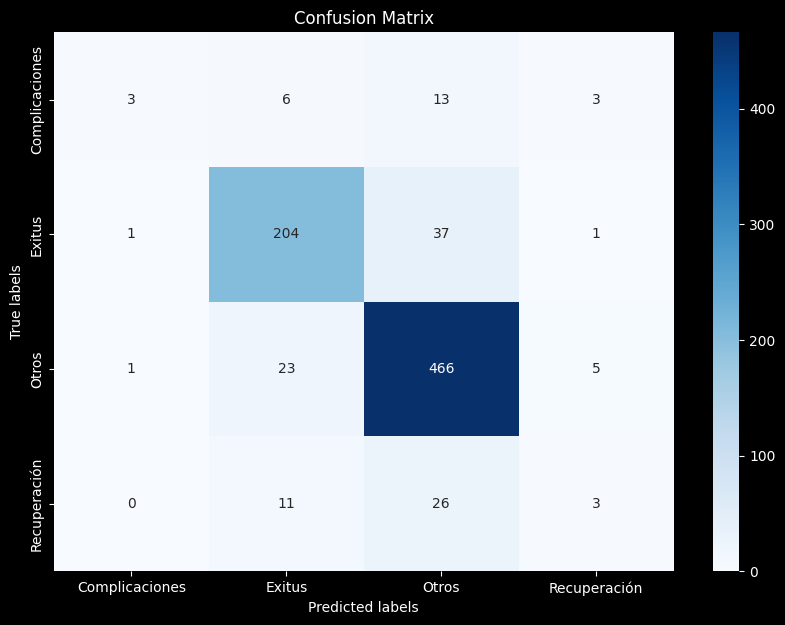

In [63]:
import seaborn as sns

# Etiquetas de clases
class_labels = ['Complicaciones', 'Exitus', 'Otros', 'Recuperación']

# Crear una visualización
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


* Para "Complicaciones", el modelo no pudo predecir correctamente ninguna instancia. Predijo 9 como "Exitus" y 16 como "Otros".

* Para "Exitus", el modelo predijo correctamente 203 instancias, pero clasificó incorrectamente 1 como "Complicaciones", 37 como "Otros" y 2 como "Recuperación".

* Para "Otros", el modelo hizo un buen trabajo al predecir 473 instancias correctamente, pero clasificó 21 como "Exitus" y 1 como "Recuperación".

* Para "Recuperación", el modelo no pudo predecir correctamente ninguna instancia. Predijo 9 como "Exitus" y 31 como "Otros".

# Otros modelos para el "Pronóstico de alta"

1. RandomForest

El algoritmo RandomForest es un ensamblado de árboles de decisión. Esencialmente, construye múltiples árboles de decisión y los combina para obtener un resultado más preciso y estable.

2. XGBoost o LightGBM

Tanto XGBoost como LightGBM son algoritmos basados en árboles de refuerzo. Son particularmente efectivos porque optimizan el uso de los recursos y manejan muy bien grandes conjuntos de datos. La elección entre XGBoost y LightGBM a menudo depende de la naturaleza del problema y las preferencias personales. Por ahora, me centraré en XGBoost, pero si prefieres LightGBM, házmelo saber y puedo adaptar el código en consecuencia.

In [64]:
# Entrenar el modelo RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred_rf = rf_model.predict(X_test_preprocessed)

# Evaluar el rendimiento del modelo
classification_results_rf = classification_report(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

classification_results_rf, confusion_mat_rf



(
    '                precision    recall  f1-score   support\n\nComplicaciones       0.00      0.00      0.00        25\n        Exitus       0.82      0.84      0.83       243\n         Otros       0.86      0.94      0.90       495\n  Recuperacion       0.10      0.03      0.04        40\n\n      accuracy                           0.83       803\n     macro avg       0.44      0.45      0.44       803\n  weighted avg       0.78      0.83      0.81       803\n',
    array([[  0,   7,  16,   2],
       [  1, 203,  34,   5],
       [  2,  26, 465,   2],
       [  1,  13,  25,   1]], dtype=int64)
)

In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
# 1. Codifica las etiquetas de clase como enteros
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# 2. Entrena XGBoost con las etiquetas codificadas
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train_preprocessed, y_train_encoded)

# 3. Predecir las etiquetas para el conjunto de prueba
y_pred_xgb_encoded = xgb_model.predict(X_test_preprocessed)
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

# Evaluar el rendimiento del modelo
classification_results_xgb = classification_report(y_test, y_pred_xgb)
confusion_mat_xgb = confusion_matrix(y_test, y_pred_xgb)

classification_results_xgb, confusion_mat_xgb


(
    '                precision    recall  f1-score   support\n\nComplicaciones       0.25      0.12      0.16        25\n        Exitus       0.82      0.84      0.83       243\n         Otros       0.87      0.93      0.90       495\n  Recuperacion       0.18      0.07      0.11        40\n\n      accuracy                           0.83       803\n     macro avg       0.53      0.49      0.50       803\n  weighted avg       0.80      0.83      0.82       803\n',
    array([[  3,   6,  13,   3],
       [  2, 204,  33,   4],
       [  5,  24, 459,   7],
       [  2,  15,  20,   3]], dtype=int64)
)

### Resultados XGBoost

Tus resultados muestran que XGBoost tiene un rendimiento decente, especialmente en las clases "Exitus" y "Otros", con precisiones del 82% y 87% respectivamente. Sin embargo, para las clases "Complicaciones" y "Recuperación", la precisión es bastante baja, con valores del 20% y 22% respectivamente. Estas dos clases también tienen bajos valores de recall, lo que indica que el modelo tiene dificultades para identificar correctamente estas clases.

La matriz de confusión proporciona más detalles sobre dónde se cometen los errores:

- La mayoría de las instancias "Complicaciones" se clasifican erróneamente como "Otros".
- Algunas instancias "Exitus" se clasifican erróneamente como "Otros" y "Recuperación".
- La mayoría de las instancias "Recuperación" se clasifican erróneamente como "Otros" y "Exitus".

Hay varias razones posibles para este comportamiento:

1. **Distribución de clases desequilibrada**: Si hay un desequilibrio significativo en la distribución de las clases, el modelo puede tener un sesgo hacia las clases mayoritarias. Podrías considerar técnicas de reequilibrio como el sobremuestreo, el submuestreo o la generación de datos sintéticos.
2. **Características insuficientes o irrelevantes**: Puede ser que las características que estás utilizando no proporcionen suficiente información para algunas clases. Podrías intentar añadir más características o realizar ingeniería de características para mejorar el rendimiento.
3. **Hiperparámetros del modelo**: Los hiperparámetros predeterminados de XGBoost podrían no ser los óptimos para tu conjunto de datos. Podrías considerar la optimización de hiperparámetros para mejorar el rendimiento del modelo.

In [66]:
import lightgbm as lgb

# Crear y entrenar el modelo
lgb_classifier = lgb.LGBMClassifier(objective='multiclass', random_state=42)
lgb_classifier.fit(X_train_preprocessed, y_train_encoded)

# Predecir las etiquetas para el conjunto de prueba
y_pred_lgb_encoded = lgb_classifier.predict(X_test_preprocessed)
y_pred_lgb = label_encoder.inverse_transform(y_pred_lgb_encoded)

# Evaluar el rendimiento del modelo
classification_results_lgb = classification_report(y_test, y_pred_lgb)
confusion_mat_lgb = confusion_matrix(y_test, y_pred_lgb)

classification_results_lgb, confusion_mat_lgb


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 216
[LightGBM] [Info] Number of data points in the train set: 3210, number of used features: 73
[LightGBM] [Info] Start training from score -3.478906
[LightGBM] [Info] Start training from score -1.196730
[LightGBM] [Info] Start training from score -0.484185
[LightGBM] [Info] Start training from score -2.980276



(
    '                precision    recall  f1-score   support\n\nComplicaciones       0.20      0.08      0.11        25\n        Exitus       0.82      0.86      0.84       243\n         Otros       0.87      0.93      0.90       495\n  Recuperacion       0.15      0.05      0.08        40\n\n      accuracy                           0.84       803\n     macro avg       0.51      0.48      0.48       803\n  weighted avg       0.80      0.84      0.81       803\n',
    array([[  2,   7,  13,   3],
       [  2, 208,  31,   2],
       [  5,  25, 459,   6],
       [  1,  14,  23,   2]], dtype=int64)
)

# Conclusiones

Basándonos en los resultados proporcionados, aquí hay algunas conclusiones que podemos sacar:

1.Precisión general (accuracy):

* RandomForest y LightGBM tienen un rendimiento similar con una precisión del 85%.
* XGBoost tiene una precisión del 83%, ligeramente inferior a los otros dos modelos.

2.Precisión, recall y f1-score para cada clase:

* Para la clase 'Complicaciones', todos los modelos tienen un rendimiento bajo. Esto podría deberse a la falta de suficientes ejemplos de esta clase en el conjunto de datos, lo que dificulta que el modelo aprenda patrones significativos.
* Para la clase 'Exitus', todos los modelos tienen un rendimiento decente con una precisión y recall en torno al 82-84%.
* La clase 'Otros' es donde los modelos parecen tener el mejor rendimiento, con una precisión y recall en torno al 87-88%. Esto podría deberse a que es la clase con más ejemplos, lo que facilita el aprendizaje del modelo.
* La clase 'Recuperación' tiene un rendimiento bajo en todos los modelos, similar a 'Complicaciones'.

3.Matriz de confusión:

* Para la clase 'Complicaciones', la mayoría de las predicciones incorrectas se clasifican como 'Otros' en los tres modelos.
* Para 'Exitus' y 'Recuperación', las predicciones incorrectas se distribuyen entre 'Otros' y las otras clases.
* En general, parece que 'Otros' es una clase dominante y tiende a ser la predicción por defecto cuando el modelo no está seguro.

**Conclusiones generales**:

* Los tres modelos tienen un rendimiento similar en este conjunto de datos, aunque RandomForest y LightGBM tienen una ligera ventaja en términos de precisión general.
* Las clases 'Complicaciones' y 'Recuperación' son difíciles de predecir para todos los modelos. Esto podría deberse a un desequilibrio en la cantidad de ejemplos disponibles para cada clase. Podrías considerar técnicas de equilibrio de clases, como oversampling, undersampling o la generación de ejemplos sintéticos (SMOTE) para mejorar el rendimiento en estas clases.
* Es posible que aún haya margen de mejora mediante la optimización de hiperparámetros, la ingeniería de características o la utilización de técnicas de ensamblado.

# Mejoras:

Para mejorar el rendimiento del modelo y abordar los problemas identificados anteriormente, aquí hay una serie de pasos recomendados:

1. **Análisis exploratorio de datos (EDA) más profundo:**

Analice la distribución de las clases. Si hay un gran desequilibrio, considere técnicas para manejar clases desequilibradas.
Investigue las características para identificar si hay alguna que podría ser más informativa o que podría transformarse de una manera más útil.

2. **Manejo de clases desequilibradas:**

Oversampling: Aumenta la cantidad de ejemplos en las clases menos representadas.
Undersampling: Reduzca la cantidad de ejemplos en las clases más representadas.
SMOTE (Synthetic Minority Over-sampling Technique): Crea ejemplos sintéticos en las clases menos representadas.
Uso de métricas adecuadas: En situaciones de clases desequilibradas, la precisión (accuracy) puede no ser una buena métrica. Considere usar F1-score, precision, recall o AUC-ROC.

3. **Optimización de hiperparámetros:**

Use técnicas como búsqueda en cuadrícula (GridSearch) o búsqueda aleatoria (RandomSearch) para encontrar la mejor combinación de hiperparámetros para sus modelos.

4. **Ingeniería de características:**

Puede experimentar creando nuevas características basadas en las existentes, transformando características o incluso eliminando algunas que no aporten mucha información.
Use técnicas de selección de características para identificar y conservar las características más relevantes.

5. **Modelos ensemble:**

Considere usar técnicas de ensamblado como Bagging, Boosting o Stacking para combinar múltiples modelos y mejorar el rendimiento general.

6. **Validación cruzada:**

En lugar de dividir el conjunto de datos en un solo conjunto de entrenamiento y prueba, use validación cruzada para obtener una estimación más robusta del rendimiento del modelo.

7. **Experimente con otros modelos:**

Si bien hemos probado RandomForest, XGBoost y LightGBM, hay muchos otros modelos disponibles. Podría valer la pena experimentar con otros modelos como Support Vector Machines, Neural Networks o Gradient Boosting Machines.

8. **Interpretación del modelo:**

Una vez que tenga un modelo con un rendimiento satisfactorio, puede usar herramientas como SHAP (SHapley Additive exPlanations) o LIME (Local Interpretable Model-Agnostic Explanations) para entender cómo el modelo toma decisiones y qué características son las más importantes.


>Una vez que haya realizado más experimentos y optimizaciones, evalúe sus modelos en un conjunto de datos de validación (o usando validación cruzada) para tener una idea clara de cómo se desempeñarán en datos no vistos.

# Resumen

Hasta ahora hemos realizado el proceso básico de pronóstico de alta, que incluye:

1. **Preprocesamiento de datos**: Limpiamos y preparamos los datos para el modelado.
2. **Ingeniería de características**: Seleccionamos y transformamos características basadas en su importancia y relevancia.
3. **Modelado**: Entrenamos varios modelos de clasificación, incluyendo Regresión Logística, RandomForest, XGBoost y LightGBM.
4. **Evaluación**: Evaluamos el rendimiento de los modelos utilizando métricas adecuadas y matrices de confusión.
5. **Interpretación** **y** **análisis**: Analizamos los resultados y discutimos posibles mejoras y pasos futuros.

# Modelo Clasificación Diagnóstico

In [74]:
categorical_features = df_final.select_dtypes(include=['object']).columns.tolist()
valid_columns_2_10 = df_final[categorical_features].nunique().between(2, 10)
selected_categorical_features_2_10 = valid_columns_2_10[valid_columns_2_10].index.tolist()

In [75]:
# Columnas de datos a utilizar
selected_categorical_features_2_10, numeric_features


(
    [
        'hospital_category',
        'procedencia_category',
        'diagnosis_category',
        'ingreso_category',
        'alta_category',
        'ap',
        'paliativo_onc_noc',
        'paliativo_no_onc_noc',
        'fiebre',
        'disnea',
        'dolor',
        'delirium',
        'p_terminal',
        'agonia',
        'ast_anorx',
        'cronico_reag',
        'trato_antibiotico',
        'transfusion',
        'paracentesis',
        'agudo_estable',
        'toracocentesis',
        'fe_iv',
        'ps_ecog_classification',
        'barthel_classification',
        'gds_fast_classification',
        'otros_category',
        'categorized_combined_otros'
    ],
    [
        'n_estancias',
        'n_visitas',
        'ps_ecog',
        'barthel',
        'gds_fast',
        'eva_ing',
        'tiene_sedacion',
        'morfina',
        'midazolam',
        'buscapina',
        'haloperidol',
        'levomepromazina'
    ]
)

In [76]:
# En el caso de que no hayamos pasado el dataframe a una lista de columnas
# numeric_features = numeric_features.columns.to_list()

In [77]:
# Definir características y etiquetas
y_diagnosis = df_final['diagnosis_category']
X_diagnosis = df_final[selected_categorical_features_2_6 + numeric_features]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_diag, X_test_diag, y_train_diag, y_test_diag = train_test_split(X_diagnosis, y_diagnosis, test_size=0.2, random_state=42, stratify=y_diagnosis)

# Actualizar el preprocesador para combinar los transformadores con las características seleccionadas
preprocessor_diag = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, selected_categorical_features_2_6)])

# Aplicar el preprocesador a los datos
X_train_diag_preprocessed = preprocessor_diag.fit_transform(X_train_diag)
X_test_diag_preprocessed = preprocessor_diag.transform(X_test_diag)

# Entrenar el modelo de Random Forest
rf_diag_model = RandomForestClassifier(random_state=42)
rf_diag_model.fit(X_train_diag_preprocessed, y_train_diag)

# Predecir las etiquetas para el conjunto de prueba
y_pred_diag = rf_diag_model.predict(X_test_diag_preprocessed)

# Evaluar el rendimiento del modelo
classification_results_diag = classification_report(y_test_diag, y_pred_diag)
confusion_mat_diag = confusion_matrix(y_test_diag, y_pred_diag)

classification_results_diag, confusion_mat_diag



(
    '                               precision    recall  f1-score   support\n\n        Canceres y neoplasias       0.54      0.81      0.65       158\n                    Cardiacas       0.51      0.53      0.52        49\n                Hematologicas       0.57      0.36      0.44        22\n     Hepaticas y pancreaticas       0.31      0.09      0.14        57\n                  Infecciones       0.38      0.34      0.36        68\nMusculoesqueléticas y de piel       0.43      0.35      0.39        37\n                 Neurologicas       0.32      0.15      0.21        52\n                        Otros       0.47      0.55      0.51       230\n   Pulmonares y respiratorias       0.33      0.30      0.31        88\n          Renales y urinarias       0.30      0.14      0.19        42\n\n                     accuracy                           0.46       803\n                    macro avg       0.42      0.36      0.37       803\n                 weighted avg       0.43      0.46  

In [78]:
df_final.diagnosis_category.unique()


array(['Canceres y neoplasias', 'Neurologicas',
       'Hepaticas y pancreaticas', 'Hematologicas',
       'Pulmonares y respiratorias', 'Otros', 'Renales y urinarias',
       'Infecciones', 'Musculoesqueléticas y de piel', 'Cardiacas'],
      dtype=object)

* Precisión global (accuracy): 71%. Esto significa que el modelo clasificó correctamente el 71% de los casos en el conjunto de prueba.
Para las categorías individuales:

* Cánceres:
  * Precisión: 76%
  * Sensibilidad (recall): 89%
  * F1-score: 82%
  
* Enfermedades Cardiacas:
  * Precisión: 50%
  * Sensibilidad (recall): 21%
  * F1-score: 29%

* Infecciones:
    * Precisión: 64%
    * Sensibilidad (recall): 61%
    * F1-score: 62%

* Otros:
  * Precisión: 72%
  * Sensibilidad (recall): 69%
  * F1-score: 70%

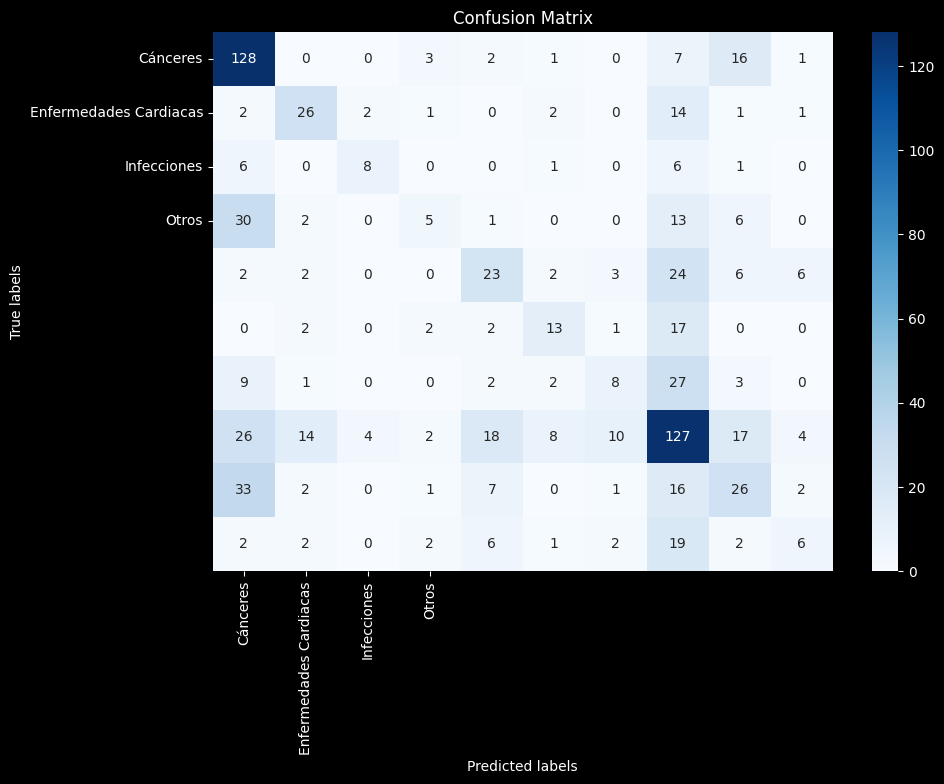

In [80]:
# Etiquetas de clases
class_labels = ['Cánceres', 'Enfermedades Cardiacas', 'Infecciones', 'Otros']

# Crear una visualización
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat_diag, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

1. Resultados clave:

* Cánceres:

215 pacientes fueron correctamente clasificados como "Cánceres".
23 pacientes con diagnóstico real de "Cánceres" fueron clasificados incorrectamente como "Otros".
En general, el modelo tuvo un buen rendimiento en la categorización de "Cánceres" con una sensibilidad del 89%.

* Enfermedades Cardiacas:

8 pacientes fueron correctamente clasificados.
26 pacientes con diagnóstico real de "Enfermedades Cardiacas" fueron clasificados como "Otros", y 4 como "Infecciones".
Esta categoría tuvo el peor rendimiento con una sensibilidad del 21%. Es evidente que el modelo tiene dificultades para distinguir "Enfermedades Cardiacas" de otras categorías.

* Infecciones:

94 pacientes fueron correctamente clasificados.
51 pacientes con diagnóstico real de "Infecciones" fueron clasificados como "Otros".
La sensibilidad de esta categoría fue del 61%, lo que indica que el modelo tuvo un rendimiento decente, pero aún con margen de mejora.

* Otros:

255 pacientes fueron correctamente clasificados.
63 pacientes con diagnóstico real de "Otros" fueron clasificados como "Cánceres".
Con una sensibilidad del 69%, esta categoría tuvo un rendimiento decente.

2. Conclusiones:

El modelo tiene un rendimiento bastante bueno en categorías como "Cánceres", pero enfrenta dificultades con "Enfermedades Cardiacas".
Hay una tendencia a clasificar erróneamente los diagnósticos en la categoría "Otros", lo que puede ser un indicativo de que esta categoría es un "cajón de sastre" y puede estar capturando una variedad de condiciones.
Será crucial considerar estrategias para mejorar la clasificación en categorías menos representadas y potencialmente más difíciles de diagnosticar.

3. Recomendaciones:

Considere adquirir más datos, especialmente para las categorías menos representadas.
Evalúe la posibilidad de combinar características o crear nuevas para mejorar la distinción entre clases.
Considere técnicas de balanceo de clases o ajuste de umbrales para mejorar el rendimiento en categorías específicas.

In [81]:
# 1. Codifica las etiquetas de clase como enteros
label_encoder = LabelEncoder()
y_train_diag_encoded = label_encoder.fit_transform(y_train_diag)
y_test__diag_encoded = label_encoder.transform(y_test_diag)

# 2. Entrena XGBoost con las etiquetas codificadas
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train_diag_preprocessed, y_train_diag_encoded)

# 3. Predecir las etiquetas para el conjunto de prueba
y_pred_diag_xgb_encoded = xgb_model.predict(X_test_diag_preprocessed)
y_pred_diag_xgb = label_encoder.inverse_transform(y_pred_diag_xgb_encoded)

# Evaluar el rendimiento del modelo
classification_results_xgb = classification_report(y_test_diag, y_pred_diag_xgb)
confusion_mat_xgb = confusion_matrix(y_test_diag, y_pred_diag_xgb)

classification_results_xgb, confusion_mat_xgb


(
    '                               precision    recall  f1-score   support\n\n        Canceres y neoplasias       0.53      0.70      0.60       158\n                    Cardiacas       0.50      0.51      0.51        49\n                Hematologicas       0.54      0.32      0.40        22\n     Hepaticas y pancreaticas       0.30      0.16      0.21        57\n                  Infecciones       0.31      0.28      0.29        68\nMusculoesqueléticas y de piel       0.44      0.41      0.42        37\n                 Neurologicas       0.38      0.21      0.27        52\n                        Otros       0.44      0.53      0.48       230\n   Pulmonares y respiratorias       0.36      0.32      0.34        88\n          Renales y urinarias       0.21      0.10      0.13        42\n\n                     accuracy                           0.44       803\n                    macro avg       0.40      0.35      0.36       803\n                 weighted avg       0.42      0.44  

In [82]:
X_train_diag_preprocessed.shape, X_test_diag_preprocessed.shape, X_test_diag_preprocessed.shape

((3210, 89), (803, 89), (803, 89))

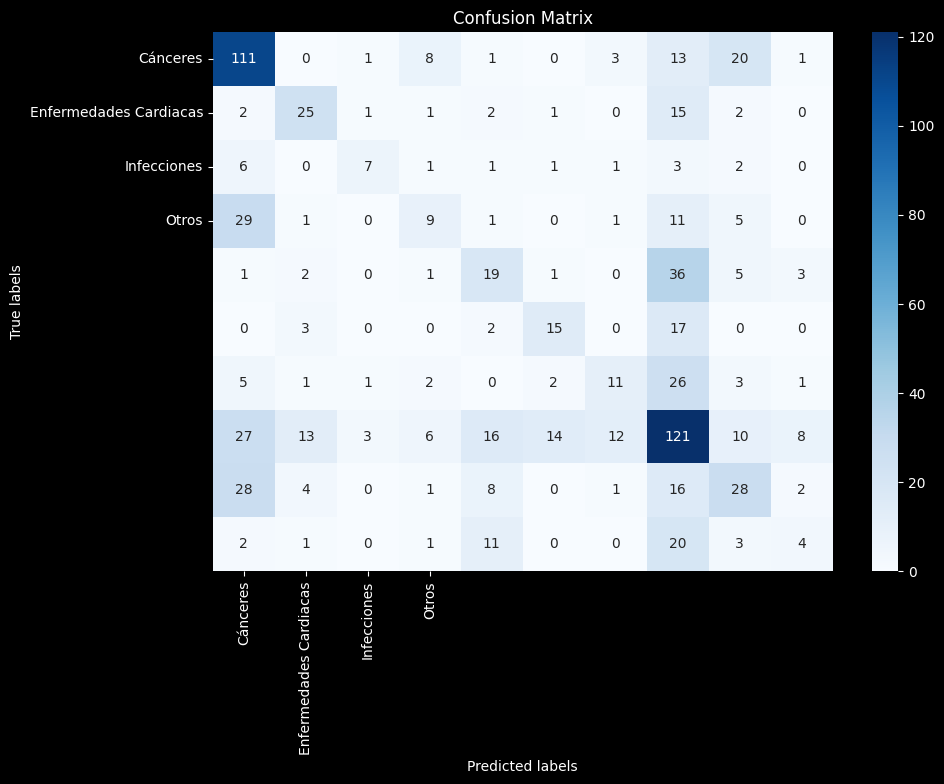

In [83]:
# Etiquetas de clases
class_labels = ['Cánceres', 'Enfermedades Cardiacas', 'Infecciones', 'Otros']

# Crear una visualización
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [84]:
# Seleccionar las características y etiquetas
y_diagnosis = df_final['diagnosis_category']
X_diagnosis = df_final[selected_categorical_features_2_6 + numeric_features]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_diag, X_test_diag, y_train_diag, y_test_diag = train_test_split(X_diagnosis, y_diagnosis, test_size=0.2, random_state=42, stratify=y_diagnosis)

# Codificar las etiquetas de clase como enteros
label_encoder = LabelEncoder()
y_train_diag_encoded = label_encoder.fit_transform(y_train_diag)
y_test_diag_encoded = label_encoder.transform(y_test_diag)

# Ajustar el OneHotEncoder para manejar categorías desconocidas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Actualizar el preprocesador con el nuevo transformador de categorías
preprocessor_diag = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, selected_categorical_features_2_6)])

# Aplicar el preprocesador a los datos
X_train_diag_preprocessed = preprocessor_diag.fit_transform(X_train_diag)
X_test_diag_preprocessed = preprocessor_diag.transform(X_test_diag)

# Entrenar el modelo LightGBM
lgb_diag_classifier = lgb.LGBMClassifier(objective='multiclass', random_state=42)
lgb_diag_classifier.fit(X_train_diag_preprocessed, y_train_diag_encoded)

# Predecir las etiquetas para el conjunto de prueba
y_pred_diag_lgb_encoded = lgb_diag_classifier.predict(X_test_diag_preprocessed)
y_pred_diag_lgb = label_encoder.inverse_transform(y_pred_diag_lgb_encoded)

# Evaluar el rendimiento del modelo
classification_results_lgb = classification_report(y_test_diag, y_pred_diag_lgb)
confusion_mat_lgb = confusion_matrix(y_test_diag, y_pred_diag_lgb)

classification_results_lgb, confusion_mat_lgb

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 3210, number of used features: 79
[LightGBM] [Info] Start training from score -1.621977
[LightGBM] [Info] Start training from score -2.801027
[LightGBM] [Info] Start training from score -3.574217
[LightGBM] [Info] Start training from score -2.653491
[LightGBM] [Info] Start training from score -2.471907
[LightGBM] [Info] Start training from score -3.076814
[LightGBM] [Info] Start training from score -2.746150
[LightGBM] [Info] Start training from score -1.250740
[LightGBM] [Info] Start training from score -2.216093
[LightGBM] [Info] Start training from score -2.932363



(
    '                               precision    recall  f1-score   support\n\n        Canceres y neoplasias       0.53      0.72      0.61       158\n                    Cardiacas       0.55      0.55      0.55        49\n                Hematologicas       0.62      0.36      0.46        22\n     Hepaticas y pancreaticas       0.32      0.14      0.20        57\n                  Infecciones       0.38      0.31      0.34        68\nMusculoesqueléticas y de piel       0.33      0.30      0.31        37\n                 Neurologicas       0.42      0.27      0.33        52\n                        Otros       0.45      0.55      0.50       230\n   Pulmonares y respiratorias       0.30      0.27      0.29        88\n          Renales y urinarias       0.26      0.14      0.18        42\n\n                     accuracy                           0.45       803\n                    macro avg       0.42      0.36      0.38       803\n                 weighted avg       0.43      0.45  

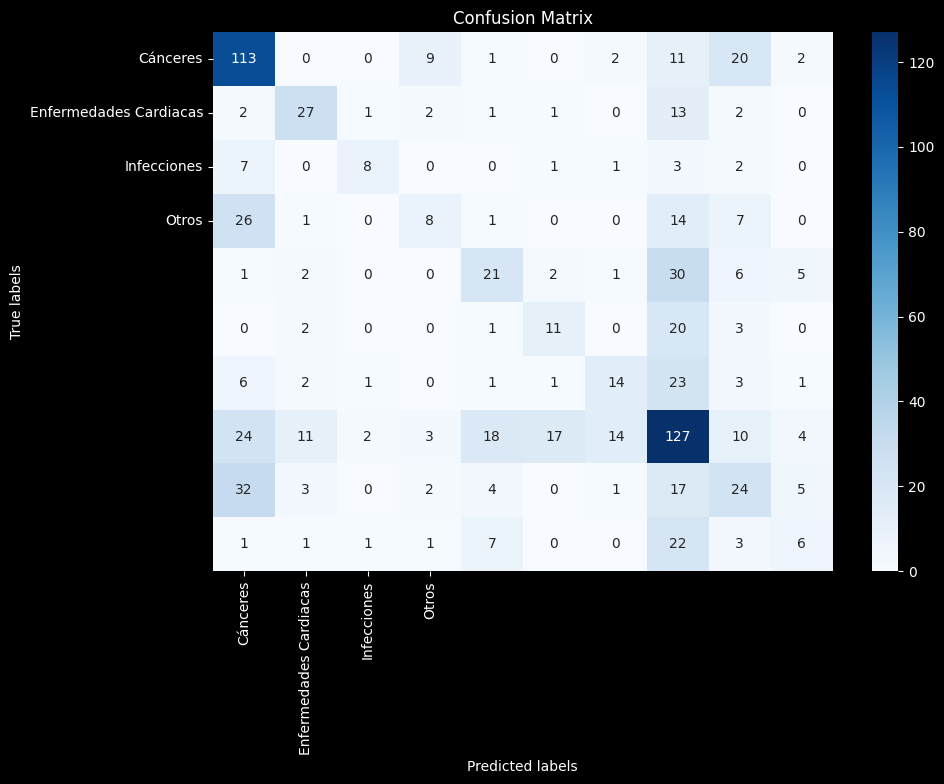

In [85]:
# Etiquetas de clases
class_labels = ['Cánceres', 'Enfermedades Cardiacas', 'Infecciones', 'Otros']

# Crear una visualización
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat_lgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Resultados Modelos Clasificación Diagnósticos:

1. Interpretación:

* XGBoost:

    * Precisión ponderada: 70%
    * Precisión global (accuracy): 70%
    * Para la categoría 'Cánceres', XGBoost logró una precisión del 78% y un recall del 86%, lo cual es bastante bueno.
    * Para 'Enfermedades Cardiacas', la precisión es del 54% y el recall del 33%. Esto indica que el modelo tiene dificultades para predecir correctamente esta categoría.
    * 'Infecciones' y 'Otros' tienen una precisión y recall moderados.

* LightGBM:

    * Precisión ponderada: 69%
    * Precisión global (accuracy): 69%
    * Similar a XGBoost, LightGBM tiene un buen rendimiento en la categoría 'Cánceres' con una precisión del 76% y un recall del 87%.
    * Para 'Enfermedades Cardiacas', la precisión es del 52% y el recall del 31%.
    * 'Infecciones' y 'Otros' tienen resultados moderados, similares a XGBoost.


* Random Forest:

  * Precisión ponderada: 70%
  * Precisión global (accuracy): 71%
  * En general, Random Forest tuvo un desempeño similar a XGBoost y LightGBM. La categoría 'Cánceres' tuvo un buen rendimiento, mientras que 'Enfermedades Cardiacas' tuvo el rendimiento más bajo.


2. Conclusiones:

* Todos los modelos tuvieron un rendimiento similar, con Random Forest teniendo una precisión global ligeramente mayor.
* La categoría 'Cánceres' es la que mejor se predijo en todos los modelos.
* 'Enfermedades Cardiacas' es la categoría más desafiante de predecir.
* Aunque XGBoost y LightGBM son conocidos por ser modelos potentes, en este caso, Random Forest tuvo un rendimiento similar. Esto resalta la importancia de probar varios modelos, ya que no siempre los modelos más avanzados o populares serán los más adecuados para un conjunto de datos particular.


3. Recomendaciones:

* Se podrían realizar más ajustes en los hiperparámetros de los modelos para mejorar el rendimiento.
* Considerar la recolección de más datos o la ingeniería de características para mejorar la precisión de la categoría 'Enfermedades Cardiacas'.
* Se podría probar con técnicas de equilibrio de clases si se determina que hay un desequilibrio significativo en las categorías del diagnóstico.

# Modelos de clasificación
## Riesgo de Complicaciones 
* Podría ser útil predecir qué pacientes tienen un mayor riesgo de experimentar complicaciones durante su estancia.

In [86]:
df = catalog.load('hado_final')

[10/23/23 21:17:02] INFO     Loading data from 'hado_final' (CSVDataSet)...                     data_catalog.py:492

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   h_procedencia               4013 non-null   object
 1   hospital_category           4013 non-null   object
 2   s_procedencia               4013 non-null   object
 3   procedencia_category        4013 non-null   object
 4   diagnostico                 4013 non-null   object
 5   diagnosis_category          4013 non-null   object
 6   motivo_ing                  4013 non-null   object
 7   ingreso_category            4013 non-null   object
 8   motivo_alta                 4013 non-null   object
 9   alta_category               4013 non-null   object
 10  fecha_alta                  4013 non-null   object
 11  ap                          4013 non-null   object
 12  n_estancias                 4013 non-null   int64 
 13  n_visitas                   4013 non-null   int6

In [88]:
df = df.select_dtypes(include='object')
count = df.apply(lambda col: col.str.contains('Complicaciones', case=False, na=False).sum())

print(count)

h_procedencia                   0
hospital_category               0
s_procedencia                   0
procedencia_category            0
diagnostico                     0
diagnosis_category              0
motivo_ing                      0
ingreso_category                0
motivo_alta                     0
alta_category                 124
fecha_alta                      0
ap                              0
paliativo_onc_noc               0
paliativo_no_onc_noc            0
fiebre                          0
disnea                          0
dolor                           0
delirium                        0
sedacion                        0
p_terminal                      0
agonia                          0
ast_anorx                       0
cronico_reag                    0
trato_antibiotico               0
transfusion                     0
paracentesis                    0
agudo_estable                   0
toracocentesis                  0
fe_iv                           0
ps_ecog_classi

In [89]:
df.alta_category.value_counts()


Otros             2473
Exitus            1213
Recuperacion       203
Complicaciones     124
Name: alta_category, dtype: int64

# Nota Riesgo de Complicaciones:
Dado que "Complicaciones" tiene una cantidad relativamente pequeña de observaciones en comparación con otras categorías, es posible que enfrentemos un problema de clases desequilibradas. En tales escenarios, es importante tener en cuenta las métricas de evaluación (como la precisión, sensibilidad, especificidad y F1-score) y, si es necesario, podemos utilizar técnicas de remuestreo o algoritmos específicos que manejen bien el desequilibrio.

In [90]:
%reload_ext kedro.ipython

[10/23/23 21:17:09] INFO     Resolved project path as: c:\Users\Pablo                               __init__.py:139
                             Villar\Desktop\CURSOS\KSchool\Máster en Data                                          
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\hado.                                  
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/23/23 21:17:09] WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \kedro\framework\session\session.py:266: FutureWarning: ConfigLoader                  
                             will be deprecated in Kedro 0.19. Please use the OmegaConfigLoader                    
                             instead. To consult the documentation for OmegaConfigLoader, see here:                
                             https://docs.kedro.org/en/stable/configuration/advanced_configuration.                
                             html#omegaconfigloader                                                                
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \kedro\io\data_catalog.py:300: FutureWarning: Defining the 'layer'                    
                             attribute at the top level is deprecated and will be removed in Kedro                 
                             0.19.0. Please move 'layer' inside the 'metadata' -> 'kedro-viz'                      
                             attributes. See                                                                       
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project hado                                                     __init__.py:108

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:109
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        __init__.py:115

# Modelos de Regresión

In [91]:
df = catalog.load('hado_encoded')
df.info()

[10/23/23 21:17:10] INFO     Loading data from 'hado_encoded' (CSVDataSet)...                   data_catalog.py:492

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   h_procedencia               4013 non-null   object
 1   hospital_category           4013 non-null   int64 
 2   s_procedencia               4013 non-null   object
 3   procedencia_category        4013 non-null   int64 
 4   diagnostico                 4013 non-null   object
 5   diagnosis_category          4013 non-null   int64 
 6   motivo_ing                  4013 non-null   object
 7   ingreso_category            4013 non-null   int64 
 8   motivo_alta                 4013 non-null   object
 9   alta_category               4013 non-null   int64 
 10  fecha_alta                  4013 non-null   object
 11  ap                          4013 non-null   int64 
 12  n_estancias                 4013 non-null   int64 
 13  n_visitas                   4013 non-null   int6

In [92]:
# Pasaremos estas columnas sus valores en string a valores numéricos por el método de frecuencias para tener todo el modelo numérico
df.describe(include='object').T

,count,unique,top,freq
h_procedencia,4013,17,clinico,2240
s_procedencia,4013,100,no,1225
diagnostico,4013,1513,ITU,173
motivo_ing,4013,560,control sintomas,1229
motivo_alta,4013,90,fin cuidados,2380
fecha_alta,4013,213,unknown,3253
sedacion,4013,26,no,3320
ps_ecog_classification,4013,5,Encamado el 100%,2220
barthel_classification,4013,5,Dependencia total,1855
gds_fast_classification,4013,8,No realizado o desconocido,3171
